In [27]:
import pandas as pd
import numpy as np
from helpers import *
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.basicConfig(level = logging.INFO, filename='log.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

In [28]:
pam16_df=pd.read_sas("PAM/hn16_pam.sas7bdat")
all16_df=pd.read_sas("ALL/hn16_all.sas7bdat")
pam14_df=pd.read_sas("PAM/hn14_pam.sas7bdat")
all14_df=pd.read_sas("ALL/hn14_all.sas7bdat")

KeyboardInterrupt: 

This can be used for EDA

In [ ]:
all16_df = all16_df[["ID", "year", "sex", "age", "BP_PHQ_9",
                  "mh_PHQ_S", "HE_BMI", "mh_stress", "EQ5D"]]
all14_df = all14_df[["id", "year", "sex", "age", "BP_PHQ_9",
                  "mh_PHQ_S", "HE_BMI", "mh_stress", "EQ5D"]]

process_data converts all nan Values into the mean values except the Sex Column that is processed in a different way

In [ ]:
all14_df, all16_df = process_data(all14_df), process_data(all16_df)
all14_df.shape, all16_df.shape, pam14_df.shape, pam16_df.shape

((7550, 9), (8150, 9), (9848160, 12), (5796000, 12))

turning features into meaningful values

In [ ]:
#all14_df['BP_PHQ_9'], all16_df['BP_PHQ_9'] = all14_df['BP_PHQ_9'].apply(Depression_Severity_), all16_df['BP_PHQ_9'].apply(Depression_Severity_)
#all14_df['mh_PHQ_S'], all16_df['mh_PHQ_S'] = all14_df['mh_PHQ_S'].apply(Depression_Severity), all16_df['mh_PHQ_S'].apply(Depression_Severity)
all14_df['HE_BMI'], all16_df['HE_BMI'] = all14_df['HE_BMI'].apply(BMI_range), all16_df['HE_BMI'].apply(BMI_range)
pam14_df['sex'], pam16_df['sex'], all14_df['sex'], all16_df['sex'] = pam14_df['sex'].apply(Sex_name), pam16_df['sex'].apply(Sex_name), all14_df['sex'].apply(Sex_name), all16_df['sex'].apply(Sex_name)
pam14_df['age'], pam16_df['age'], all14_df['age'], all16_df['age'] = pam14_df['age'].apply(Age_range), pam16_df['age'].apply(Age_range), all14_df['age'].apply(Age_range), all16_df['age'].apply(Age_range)

In [ ]:
print(all14_df.head())

              id    year     sex      age  BP_PHQ_9  mh_PHQ_S          HE_BMI  \
0  b'A209716213'  2014.0  Female  [29-33]       0.0       1.0      overweight   
1  b'A209716214'  2014.0  Female  [54-58]       0.0       7.0      overweight   
2  b'A209716216'  2014.0    Male  [29-33]       0.0       1.0      overweight   
3  b'A209724716'  2014.0    Male  [59-65]       0.0       0.0  Healthy Weight   
4  b'A209731515'  2014.0  Female  [54-58]       0.0       0.0  Healthy Weight   

   mh_stress   EQ5D  
0        0.0  0.913  
1        1.0  0.817  
2        0.0  1.000  
3        0.0  1.000  
4        0.0  1.000  


In [ ]:
print(all16_df.head())

              ID    year     sex      age  BP_PHQ_9  mh_PHQ_S          HE_BMI  \
0  b'A651172801'  2016.0    Male  [59-65]       0.0       0.0  Healthy Weight   
1  b'A651172802'  2016.0  Female  [54-58]       1.0       5.0  Healthy Weight   
2  b'A651183001'  2016.0  Female  [39-43]       0.0       0.0  Healthy Weight   
3  b'A651183002'  2016.0    Male  [39-43]       0.0       0.0      overweight   
4  b'A651183003'  2016.0  Female  [34-38]       0.0       5.0  Healthy Weight   

   mh_stress   EQ5D  
0        0.0  1.000  
1        0.0  0.907  
2        0.0  1.000  
3        1.0  1.000  
4        1.0  0.913  


Turn all columns to uppercase and concatenate the two dataframes from 2014 and 2016 together

In [ ]:
func = lambda df: df.rename(columns=str.upper)
pam14_df, pam16_df, all14_df, all16_df = map(func, [pam14_df, pam16_df, all14_df, all16_df])
pam_combined = pd.concat([pam14_df, pam16_df], ignore_index=True)
all_combined = pd.concat([all14_df, all16_df], ignore_index=True)
pam_combined.drop('MOD_D', axis=1, inplace=True)
pam_combined['ID'] = pam_combined['ID'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
all_combined['ID'] = all_combined['ID'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [ ]:
print(pam_combined.head(), pam_combined.shape, pam_combined.isna().sum().sum())

           ID    YEAR     SEX      AGE  DAY  PAXDAY  PAXN  PAXHOUR  PAXMINUT  \
0  A209799515  2014.0  Female  [59-65]  1.0     5.0   1.0      0.0       0.0   
1  A209799515  2014.0  Female  [59-65]  1.0     5.0   2.0      0.0       1.0   
2  A209799515  2014.0  Female  [59-65]  1.0     5.0   3.0      0.0       2.0   
3  A209799515  2014.0  Female  [59-65]  1.0     5.0   4.0      0.0       3.0   
4  A209799515  2014.0  Female  [59-65]  1.0     5.0   5.0      0.0       4.0   

   PAXINTEN  PAXSTEP  
0      83.0      0.0  
1       0.0      0.0  
2       0.0      0.0  
3       0.0      0.0  
4       0.0      0.0   (15644160, 11) 0


In [ ]:
print(all_combined['AGE'].unique())
print(all_combined['AGE'].isna().sum())
print(all_combined.head(), all_combined.shape, all_combined.isna().sum().sum())

['[29-33]' '[54-58]' '[59-65]' '[19-23]' '[39-43]' '[44-48]' '[49-53]'
 '[34-38]' '[24-28]']
0
           ID    YEAR     SEX      AGE  BP_PHQ_9  MH_PHQ_S          HE_BMI  \
0  A209716213  2014.0  Female  [29-33]       0.0       1.0      overweight   
1  A209716214  2014.0  Female  [54-58]       0.0       7.0      overweight   
2  A209716216  2014.0    Male  [29-33]       0.0       1.0      overweight   
3  A209724716  2014.0    Male  [59-65]       0.0       0.0  Healthy Weight   
4  A209731515  2014.0  Female  [54-58]       0.0       0.0  Healthy Weight   

   MH_STRESS   EQ5D  
0        0.0  0.913  
1        1.0  0.817  
2        0.0  1.000  
3        0.0  1.000  
4        0.0  1.000   (15700, 9) 0


A209731515


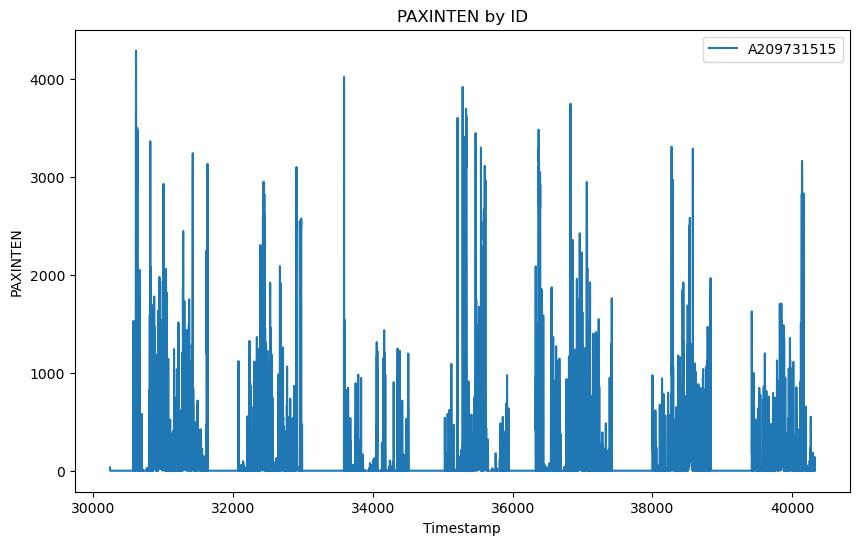

In [ ]:
pam_combined_grouped = pam_combined.groupby('ID')
# Initialize the plot
plt.figure(figsize=(10, 6))
# Iterate over each group
for name, group in pam_combined_grouped:
    plt.plot(group.index, group['PAXINTEN'], label=name)
    print(name)
    break
# Adding titles and labels
plt.title('PAXINTEN by ID')
plt.xlabel('Timestamp')
plt.ylabel('PAXINTEN')
plt.legend()
#plt.legend(title='ID')
plt.show()

Create a kombination of IDs based of group blocks contained of SEX -> AGE -> HE_BMI

In [ ]:
# Assuming grouped_df is your DataFrame containing the grouped data
#all_combined = all_combined.iloc[1:1000]
pam_grouped = pam_combined.groupby('ID')
# Create an empty list to store pairs of IDs
id_pairs = []
group_names = []
sex_names = []
age_names = []
bmi_names = []
PHQ_value = np.array([])
# Iterate over each group
for name, group in all_combined.groupby(['SEX', 'AGE', 'HE_BMI']):
    # Get IDs in the group
    ids = group['ID'].tolist()
    valid_ids = []
    for id1 in ids:
        try:
            data_participant_1 = pam_grouped.get_group(id1)['PAXINTEN'].to_numpy()
            valid_ids.append(id1)
        except KeyError:
            pass

    for id_1 in valid_ids:
        for id_2 in valid_ids:
            if id_1 == id_2: #or (id_2,id_1) in id_pairs:
                pass
            else:
                id_pairs.append((id_1,id_2))
                group_names.append(name[0] + '_' + name[1] + '_' + name[2])
                sex_names.append(name[0])
                age_names.append(name[1])
                bmi_names.append(name[2])

                # PHQ9P1 = all_combined.loc[all_combined['ID'] == id_1, 'BP_PHQ_9'].iloc[0]
                # PHQ9P2 = all_combined.loc[all_combined['ID'] == id_2, 'BP_PHQ_9'].iloc[0]

                PHQSP1 = all_combined.loc[all_combined['ID'] == id_1, 'MH_PHQ_S'].iloc[0]
                PHQSP2 = all_combined.loc[all_combined['ID'] == id_2, 'MH_PHQ_S'].iloc[0]
                
                value = int(PHQSP1 - PHQSP2)
                PHQ_value = np.append(PHQ_value, value)
    
# Convert the list of ID pairs to a DataFrame
# Goes from -27 to 27 so with absolute from 0 - 27 possible thresholds = [12, 15, 18, 20, 22, 24]
threshold = 15
id_pairs_df = pd.DataFrame(id_pairs, columns=['ID_1', 'ID_2'])
id_pairs_df['group_id'] = group_names
id_pairs_df['SEX'] = sex_names
id_pairs_df['AGE'] = age_names
id_pairs_df['HE_BMI'] = bmi_names
id_pairs_df['ID_COMBINED'] = id_pairs_df['ID_1'] + id_pairs_df['ID_2']
id_pairs_df['d_PHQ'] = PHQ_value
id_pairs_df['Depression'] = (abs(id_pairs_df['d_PHQ']) >= threshold).astype(int)
# Print the DataFrame containing pairs of IDs
print(id_pairs_df.head(100), id_pairs_df.shape)

          ID_1        ID_2                       group_id     SEX      AGE  \
0   A210768915  A212772312  Female_[19-23]_Healthy Weight  Female  [19-23]   
1   A210768915  A222753613  Female_[19-23]_Healthy Weight  Female  [19-23]   
2   A210768915  A223717913  Female_[19-23]_Healthy Weight  Female  [19-23]   
3   A210768915  A225750216  Female_[19-23]_Healthy Weight  Female  [19-23]   
4   A210768915  A232704313  Female_[19-23]_Healthy Weight  Female  [19-23]   
..         ...         ...                            ...     ...      ...   
95  A212772312  C245802914  Female_[19-23]_Healthy Weight  Female  [19-23]   
96  A212772312  D239779113  Female_[19-23]_Healthy Weight  Female  [19-23]   
97  A212772312  D240743414  Female_[19-23]_Healthy Weight  Female  [19-23]   
98  A212772312  D242763813  Female_[19-23]_Healthy Weight  Female  [19-23]   
99  A212772312  E245738313  Female_[19-23]_Healthy Weight  Female  [19-23]   

            HE_BMI           ID_COMBINED  d_PHQ  Depression  
0

Match ID1 and ID2 with the respectively actigraphy data and create a synthetic dataset with abs(PHQ9P2 - PHQ9P1) as the target variable.

In [ ]:
id_pairs_grouped = id_pairs_df.groupby('d_PHQ')
for name, group in id_pairs_grouped:
    print(name)
    print(group.count())

-27.0
ID_1           17
ID_2           17
group_id       17
SEX            17
AGE            17
HE_BMI         17
ID_COMBINED    17
d_PHQ          17
Depression     17
dtype: int64
-26.0
ID_1           12
ID_2           12
group_id       12
SEX            12
AGE            12
HE_BMI         12
ID_COMBINED    12
d_PHQ          12
Depression     12
dtype: int64
-25.0
ID_1           22
ID_2           22
group_id       22
SEX            22
AGE            22
HE_BMI         22
ID_COMBINED    22
d_PHQ          22
Depression     22
dtype: int64
-24.0
ID_1           13
ID_2           13
group_id       13
SEX            13
AGE            13
HE_BMI         13
ID_COMBINED    13
d_PHQ          13
Depression     13
dtype: int64
-23.0
ID_1           36
ID_2           36
group_id       36
SEX            36
AGE            36
HE_BMI         36
ID_COMBINED    36
d_PHQ          36
Depression     36
dtype: int64
-22.0
ID_1           43
ID_2           43
group_id       43
SEX            43
AGE            43

In [ ]:
pam_synthetic = pd.DataFrame(columns=['ID','ACTIGRAPHY_DATA'], dtype = object)
synthetic_array = np.zeros((id_pairs_df.shape[0], 10080)) # 10080 number of samples for a single patient
id_combined = []
number = 0
for index,synthetic_patient in id_pairs_df.iterrows():
    
    data_participant_1 = pam_grouped.get_group(synthetic_patient['ID_1'])['PAXINTEN'].to_numpy()
    data_participant_2 = pam_grouped.get_group(synthetic_patient['ID_2'])['PAXINTEN'].to_numpy()
    synthetic_array[number] = (data_participant_1 + data_participant_2) / 2
    id_combined.append(synthetic_patient['ID_1'] + synthetic_patient['ID_2'])
    logging.info(f"Participant_1 {synthetic_patient['ID_1']} and Participant_2 {synthetic_patient['ID_2']} added with {synthetic_array[number]}")
    number += 1
    
pam_synthetic['ID'] = id_combined
mask = []
for row in range(synthetic_array.shape[0]):
    max_value = np.max(synthetic_array[row, :])
    if max_value == 0 or max_value == 0.0:
        mask.append(row)
synthetic_array = np.delete(synthetic_array, mask, axis=0)

for row in range(synthetic_array.shape[0]):
    pam_synthetic.at[row, 'ACTIGRAPHY_DATA'] = synthetic_array[row]
id_pairs_df['ACTIGRAPHY_DATA'] = pam_synthetic['ACTIGRAPHY_DATA']      

In [29]:
import pywt
import numpy as np
from sklearn.preprocessing import StandardScaler
# Define functions to compute statistical features

def compute_energy(coeff):
    return np.sum(coeff ** 2)

def compute_mean(coeff):
    return np.mean(coeff)

def compute_std(coeff):
    return np.std(coeff)

def compute_entropy(coeff):
    p = np.abs(coeff) / np.sum(np.abs(coeff))
    return -np.sum(p * np.log2(p + np.finfo(float).eps))  # eps to avoid log(0)

def compute_features(data):
    coefficents = np.zeros(len(id_pairs_df))
    coeffs = pywt.wavedec(data, 'db1')

        #coefficents[index] = coeff
        
        # for i,participant in enumerate(coefficents):
        #     energies = np.square(participant)
        #     sorted_indices = np.argsort(energies)[::-1]
        #     cumulative_energy = np.cumsum(energies[sorted_indices])
        #     total_energy = cumulative_energy[-1]
        #     cumulative_energy /= total_energy

        #     num_features = np.searchsorted(cumulative_energy, energy_threshold)
            
        #     important_indices = sorted_indices[:num_features]
        #     coefficents[i] = participant[important_indices]

    # Extract features from the wavelet coefficients
    features = []

    for i, coeff in enumerate(coeffs):
        features.append(compute_energy(coeff))
        features.append(compute_mean(coeff))
        features.append(compute_std(coeff))
        features.append(compute_entropy(coeff))

    # Convert the feature list to a numpy array
    features = np.array(features)

    # (Optional) Normalize or standardize the features
    scaler = StandardScaler()
    features = scaler.fit_transform(features.reshape(-1, 1)).flatten()

    # print("Extracted features:")
    # print(features)

    return features

feature_list = []
for index,participant in id_pairs_df.iterrows():
    features = compute_features(participant['ACTIGRAPHY_DATA'])
    feature_list.append(features)
   
id_pairs_df['FEATURES'] = feature_list


56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
5

In [30]:
print(id_pairs_df.head())

         ID_1        ID_2                       group_id     SEX      AGE  \
0  A210768915  A212772312  Female_[19-23]_Healthy Weight  Female  [19-23]   
1  A210768915  A222753613  Female_[19-23]_Healthy Weight  Female  [19-23]   
2  A210768915  A223717913  Female_[19-23]_Healthy Weight  Female  [19-23]   
3  A210768915  A225750216  Female_[19-23]_Healthy Weight  Female  [19-23]   
4  A210768915  A232704313  Female_[19-23]_Healthy Weight  Female  [19-23]   

           HE_BMI           ID_COMBINED  d_PHQ  Depression  \
0  Healthy Weight  A210768915A212772312   -3.0           0   
1  Healthy Weight  A210768915A222753613    0.0           0   
2  Healthy Weight  A210768915A223717913   -5.0           0   
3  Healthy Weight  A210768915A225750216    0.0           0   
4  Healthy Weight  A210768915A232704313    0.0           0   

                                     ACTIGRAPHY_DATA  \
0  [54.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [54.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

In [1]:
id_pairs_df.drop('ACTIGRAPHY_DATA', axis=1, inplace=True)
print(id_pairs_df.head())

NameError: name 'id_pairs_df' is not defined

In [ ]:
id_pairs_df.to_csv(f'data/data_threshold_{threshold}.csv', index=False)